In [1]:
#------>change the sample name and round as relevant
sample = 'water'
round = 'R3'

In [2]:
#1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import os
import glob
import shutil
import fnmatch

In [3]:
#makes new 'text' and 'out' folders
path1 = ('C:/Users/smcg9089/Documents/coding/muttama_data/ASD_data/water_absorbance/text/')
path2 = ('C:/Users/smcg9089/Documents/coding/muttama_data/ASD_data/water_absorbance/out/')
#os.mkdir(path1)
#os.mkdir(path2)

#there is an initial and other dirIn because the location of the text file changes after the os.walk function
initial_dirIn = ('C:/Users/smcg9089/Documents/coding/muttama_data/ASD_data/water_absorbance/')
dirIn = ('C:/Users/smcg9089/Documents/coding/muttama_data/ASD_data/water_absorbance/text/')
dirOut = ('C:/Users/smcg9089/Documents/coding/muttama_data/ASD_data/water_absorbance/out/')

#move files
walker1 = os.walk(initial_dirIn)

for data in walker1:
    for files in data[2]:
        try:
            shutil.move(data[0] + os.sep + files, dirIn)
        except shutil.Error:
            continue

            
#2. Convert files to .csv, add row (Wavelength) and column labels (measurement 1-5)
header = (list(np.arange(1,6)))
wavelengths = list(np.arange(350,2501))

text_files = [f for f in os.listdir(dirIn) if f.endswith('.txt')]

def to_csv_file(file):
    global df
    os.chdir(dirIn)
    df = pd.read_csv(file, names = header, header=None, sep=',')
    df = df.add_prefix('measurement')
    df.insert(0,'Wavelength',wavelengths)
    df = df.set_index('Wavelength')
    print(df)

In [4]:
#need to delete .csv files from previous runs of code
def remove_csv(path):
    files_in_dir = os.listdir(path)
    filtered_files = [file for file in files_in_dir if file.endswith('.csv')]
    print(filtered_files)
    for file in filtered_files:
        path_to_file = os.path.join(path, file)
        os.remove(path_to_file)


In [5]:
#change the ISS.. number of file name to swap between samples
path = ('C:/Users/smcg9089/Documents/coding/muttama_data/ASD_data/water_absorbance/text/')
remove_csv(path)

['water.csv']


In [6]:
#call function which makes new csv files
for entry in text_files:
    file = entry
    print(to_csv_file(file))
    df.to_csv(file +'.csv')
    
#fix file names
for filename in os.listdir(dirIn):
    if filename.endswith('.txt.csv'):
        os.rename(filename,filename[:-8]+'.csv')

            measurement1  measurement2  measurement3  measurement4  \
Wavelength                                                           
350             0.716575      0.856559      0.836182      0.872606   
351             0.727560      0.868925      0.846183      0.865370   
352             0.721807      0.858606      0.829852      0.860160   
353             0.713527      0.847908      0.826406      0.861352   
354             0.712056      0.846968      0.829707      0.864652   
355             0.722476      0.859174      0.820795      0.863244   
356             0.717981      0.854961      0.817892      0.863078   
357             0.711468      0.850708      0.817692      0.859845   
358             0.713952      0.857222      0.816743      0.852422   
359             0.714725      0.847540      0.818926      0.852063   
360             0.717249      0.851401      0.827529      0.859387   
361             0.718586      0.865937      0.834714      0.865289   
362             0.70

In [7]:
#3. Use a 'for' loop to read csv's and compile into a df
path = dirIn
all_files = glob.glob('*.txt')
all_df = []
col_names = ['measurement_1','measurement_2','measurement_3','measurement_4','measurement_5','measurement_6','measurement_7','measurement_8','measurement_9','measurement_10']
wavelength = list(range(350,2501))

#make a df
for f in all_files:
    df = pd.read_csv(f, sep=',',names=col_names)
    df['MC'] = f.split('.')[-2]
    df['Wavelength'] = wavelength

    all_df.append(df)
merged_df = pd.concat(all_df, ignore_index=True, sort=True)
merged_df.head(2)

,MC,Wavelength,measurement_1,measurement_10,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9
0,water,350,0.802887,0.872606,0.764243,0.424044,0.842397,0.86260,0.716575,0.856559,0.836182,0.872606
1,water,351,0.796832,0.865370,0.769475,0.435641,0.852391,0.86464,0.727560,0.868925,0.846183,0.865370


In [8]:
column = merged_df.loc[: , 'measurement1':'measurement10']
#merged_df['mean_reflectance'] = column.mean(axis=1)
#merged_df['max_reflectance'] = column.max(axis=1)
#merged_df['min_reflectance'] = column.min(axis=1)

In [9]:
#puts 5 at the top. Dry is still down the bottom
merged_df.sort_values(by=['Wavelength'],inplace=True)
merged_df.MC.unique()

array(['water'], dtype=object)

In [10]:
merged_df.index = merged_df['Wavelength']


In [11]:
merged_df.head(1)

,MC,Wavelength,measurement_1,measurement_10,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9
Wavelength,,,,,,,,,,,,
350,water,350,0.802887,0.872606,0.764243,0.424044,0.842397,0.8626,0.716575,0.856559,0.836182,0.872606


In [12]:
merged_df = merged_df.iloc[:,2:]
merged_df.head(2)

,measurement_1,measurement_10,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9
Wavelength,,,,,,,,,,
350,0.802887,0.872606,0.764243,0.424044,0.842397,0.86260,0.716575,0.856559,0.836182,0.872606
351,0.796832,0.865370,0.769475,0.435641,0.852391,0.86464,0.727560,0.868925,0.846183,0.865370


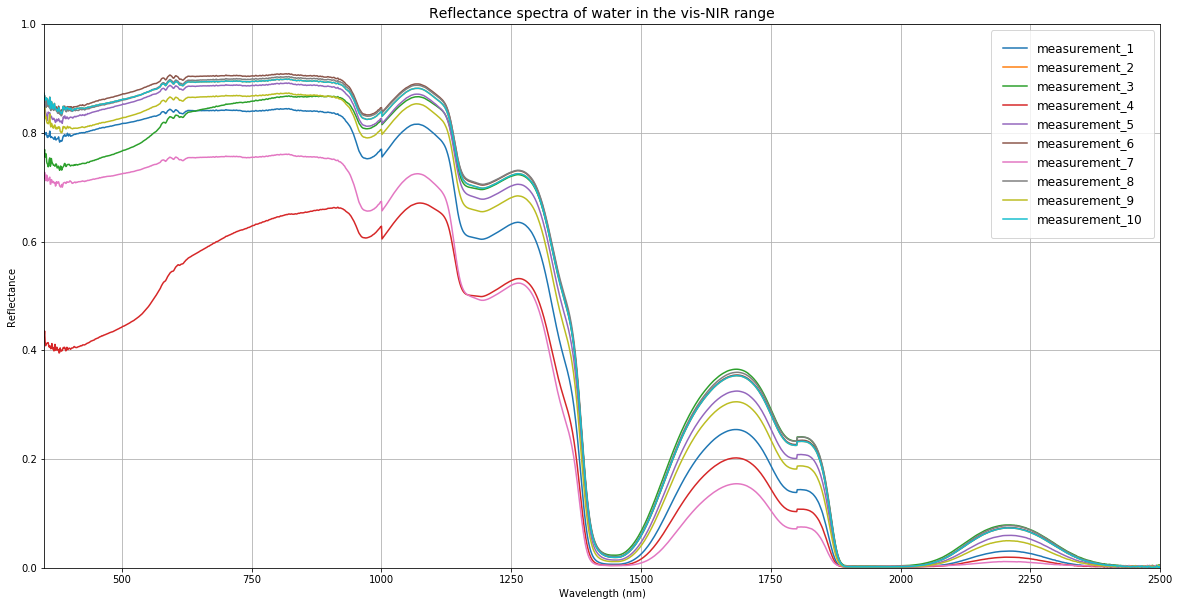

In [13]:
#plot all moisture contents on one plot
x = wavelength

plt.figure(figsize=(20,10))
plt.xlim(350,2500)
plt.ylim(0,1)
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.grid(True)
plt.title('Reflectance spectra of '+sample+' in the vis-NIR range',fontsize=14)

for mc in merged_df.columns:
    y = merged_df[mc]
    plt.plot(x,y)
    plt.legend(col_names,fancybox = 1, borderpad=True,fontsize = 12)

os.chdir('C:/Users/smcg9089/Documents/coding/muttama_data/ASD_data/water_absorbance/')
plt.savefig(sample+'_summary_reflectance_plot.pdf',format= 'pdf', orientation = ['landscape'])